11.712920216581347
13.797340610038257
15.8223294733337
17.756929896272695
19.577540828533312
21.264888092854704
22.802646405737605
24.17678112487875
25.37522708620482
26.387733892852566
27.205795973601692
27.822625882646513
28.23314865729818
28.434004952712566
28.423556070867317
28.201887182577998
27.770807148233075
27.13384501695397
26.29624497908399
13.716113001241913
15.798702206703584
17.818296881712698
19.7420112247903
21.54459238158986
23.205554857327353
24.70776244406927
26.03670026045512
27.18009320673907
28.127705506325263
28.871237407664605
29.404274398345105
29.72226427679919
29.822508171628588
29.70415774891356
29.36821469652157
28.81753135108979
28.056813811744824
27.092631717083236
15.68261173140886
17.757385972232086
19.761334038269066
21.66140656892606
23.431857435385933
25.051762202936676
26.503711272832074
27.773102974855732
28.847754767506252
29.717688390782463
30.375012142973535
30.81385783826109
31.03034838806133
31.022582304734932
30.790627676665924
30.33652236688

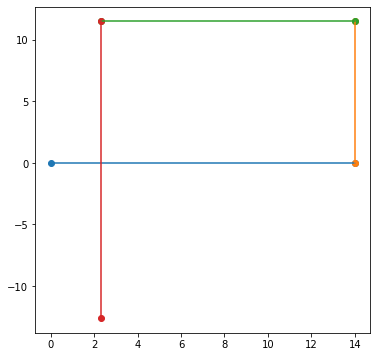

In [61]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

global theta
global r
global w
global mid_pos

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

pos = np.array([[0, 0], [0, 0], [0, 0], [0, 0], [0, 0]], dtype=float)

r = np.array([14, 11.5, 11.7, 24.1])
w = np.array([0.97,0.8,0.3,0.68])

theta = np.array([0, 0, 0, 0,0], dtype=float)  # 0 ~ pi
theta_sum = np.array([0, 0, 0, 0,0], dtype=float)  # 0 ~ pi
mid_pos = np.array([[0, 0], [0, 0], [0, 0], [0, 0]], dtype=float)
fixed_angle = True


def draw_node(x1, y1, x2, y2):
    ax.plot([x1, x2], [y1, y2])
    ax.scatter([x1, x2], [y1, y2])

def p2p_distant(x1, y1, x2, y2):
    return  ((x1-x2)**2 + (y1-y2)**2)**(1/2)

def calc_pos():
    if fixed_angle:
        for i in [0, 1, 2, 3]:
            theta_sum[i] = np.sum(theta[:i+1])

        for i in [1, 2, 3, 4]:
            # pos[i] = pos[i-1] + r * np.array( [np.cos( np.sum(theta[:i])), np.sin(np.sum(theta[:i]))], dtype=float )
            pos[i] = pos[i-1] + r[i-1] * \
                np.array([np.cos(theta_sum[i-1]), np.sin(theta_sum[i-1])], dtype=float)
    else:
        for i in [2, 1, 0]:
            theta_sum[i] = theta_sum[i+1] - theta[i+1]

        for i in [3, 2, 1, 0]:
            pos[i] = pos[i+1] - r[i] * \
                np.array([np.cos(theta_sum[i]), np.sin(theta_sum[i])], dtype=float)
            
                

    
tq1 = []
tq2 = []

for i in range(-90,91,10):
    for j in range(-90,91,10):
        for l in range(-90,91,10):
            theta = np.array([0, np.radians(i), np.radians(j), np.radians(l),0], dtype=float)  # 0 ~ pi
            calc_pos()
        
            for idx in [0,1,2,3]:
                mid_pos[idx] = (pos[idx] + pos[idx+1]) / 2
            
            # print(mid_pos)
            # print(p2p_distant(*mid_pos[3], *pos[1]))
        
            tq1_temp = 0
            tq2_temp = 0
            
            tq1_temp += w[3] * p2p_distant(*mid_pos[3], *pos[1])
            tq2_temp += w[0] * p2p_distant(*mid_pos[0], *pos[3])
            for idx in [1,2]:
                tq1_temp += w[idx] * p2p_distant(*mid_pos[idx], *pos[1])
                tq2_temp += w[idx] * p2p_distant(*mid_pos[idx], *pos[3])
            
            tq1.append(tq1_temp)
            tq2.append(tq2_temp)

for i in [0, 1, 2, 3]:
    draw_node(pos[i][0], pos[i][1], pos[i+1][0], pos[i+1][1])
# print(tq1)    

# fig2 = plt.figure(figsize=(6, 6))
# fig3 = plt.figure(figsize=(6, 6))
# ax2 = fig2.add_subplot(111, projection='3d')
# ax3 = fig3.add_subplot(111, projection='3d')

# for i_n,i in enumerate(range(-90,91,10)):
#     for j_n,j in enumerate(range(-90,91,10)):
#         for l_n,l in enumerate(range(-90,91,10)):
#             ax2.scatter(i,j,l, c = tq1[i_n+j_n+l_n])
#             ax3.scatter(i,j,l, c = tq2[i_n+j_n+l_n])



# ax.scatter(bad_points[0], bad_points[1], bad_points[2], marker='o', s=15, c='r')

# ax.view_init(0,90)
plt.show()

In [55]:
np.radians(180)

3.141592653589793

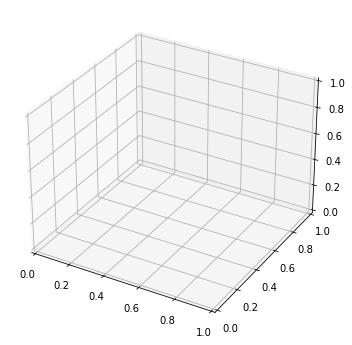

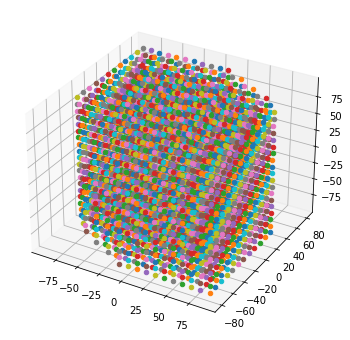

In [57]:
fig2 = plt.figure(figsize=(6, 6))
fig3 = plt.figure(figsize=(6, 6))
ax2 = fig2.add_subplot(111, projection='3d')
ax3 = fig3.add_subplot(111, projection='3d')

cmhot = plt.get_cmap("hot")


for i_n,i in enumerate(range(-90,91,10)):
    for j_n,j in enumerate(range(-90,91,10)):
        for l_n,l in enumerate(range(-90,91,10)):
            # ax2.scatter(i,j,l, c = tq1[i_n*19*19+j_n*19+l_n], cmap = cmhot)
            # ax3.scatter(i,j,l, c = tq2[i_n*19*19+j_n*19+l_n], cmap = cmhot)
            if tq2[i_n*19*19+j_n*19+l_n] > 35:
                ax3.scatter(i,j,l)

In [13]:
tq1

[110.0769652496709,
 148.59248587261013,
 221.6160502193136,
 246.4050554120824,
 214.02068881615818,
 136.2665934430091,
 122.37403926769937,
 204.54391843849086,
 245.1089186778477,
 228.95918008440782,
 161.87910267308877,
 97.90545960799884,
 183.8410605192705,
 238.93620510434113,
 239.51041455473344,
 185.35886868857102,
 99.2843481280961,
 160.18449863002832,
 228.07326460647604,
 132.5183548366005,
 136.92693623721607,
 143.53121343557092,
 144.3289420777145,
 138.43546927576205,
 132.80073229251974,
 134.99549349773446,
 141.96189698421807,
 144.91244758723553,
 140.53545098143815,
 133.82937510666204,
 133.502381326994,
 140.0122484016897,
 144.82605138808407,
 142.40595944816243,
 135.45646079085543,
 132.65401300862874,
 137.89041128025474,
 144.0778363727166,
 218.96381977906094,
 157.0023655332565,
 85.01032718028725,
 171.01418430783147,
 225.28537030079482,
 228.2836825992754,
 178.9774493035197,
 94.63771616102072,
 148.06210251274376,
 214.33538253716839,
 233.1092432

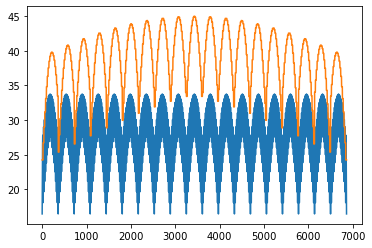

In [65]:
plt.plot(np.array(tq1))
plt.plot(np.array(tq2))
# kg-cm

In [23]:
max(tq1),max(tq2)

(33.775000000000006, 45.00900000000001)

In [28]:
19*19*19

6859

TypeError: plot() missing 1 required positional argument: 'ys'

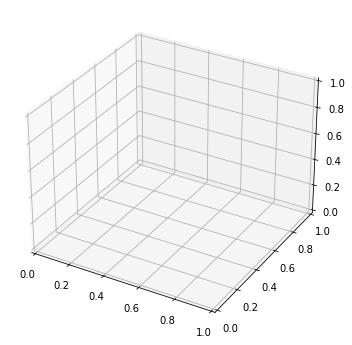

In [37]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(np.array(tq2).reshape(19,19,19) > 35)

In [86]:
def theta_torque(t1,t2,t3):
    
    global theta
    global r
    global w
    global mid_pos
    
    theta = np.array([0, np.radians(t1), np.radians(t2), np.radians(t3),0], dtype=float)  # 0 ~ pi
    calc_pos()

    for idx in [0,1,2,3]:
        mid_pos[idx] = (pos[idx] + pos[idx+1]) / 2
    
    print(mid_pos)
    # print(p2p_distant(*mid_pos[3], *pos[1]))

    tq1_temp = 0
    tq2_temp = 0
    tq3_temp = 0
    tq4_temp = 0
    tq5_temp = 0
    tq6_temp = 0
    
    tq5_temp = w[3] * p2p_distant(*mid_pos[3], *pos[1])
    tq6_temp = w[0] * p2p_distant(*mid_pos[0], *pos[3])
    
    tq3_temp = tq5_temp + w[2] * p2p_distant(*mid_pos[2], *pos[1])
    tq4_temp = tq6_temp + w[1] * p2p_distant(*mid_pos[1], *pos[3])
    
    tq1_temp = tq3_temp + w[1] * p2p_distant(*mid_pos[1], *pos[1])
    tq2_temp = tq4_temp + w[2] * p2p_distant(*mid_pos[2], *pos[3])
    
    return [tq1_temp, tq2_temp, tq3_temp, tq4_temp, tq5_temp, tq6_temp]



In [87]:
theta_torque(30,45,-30)

[[ 7.          0.        ]
 [18.97964607  2.875     ]
 [25.47338356 11.40066608]
 [35.50811168 25.57196888]]


[32.17415894582397,
 40.264736288078346,
 27.574158945823967,
 38.509736288078344,
 22.72181574209461,
 25.48437720889991]